# Machine Learning Models
This notebook compares multiple ML models (Logistic Regression, KNN, Decision Tree, SVM, Random Forest, and Boosting models) on a **noisy version** of the dataset.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# --- Load the already preprocessed dataset ---
df = pd.read_csv('fully_preprocessed_dataset_with_target_encoded.csv') 
print('Dataset Loaded Successfully:', df.shape)
df.head()

Dataset Loaded Successfully: (990, 11)


,Degree,Domain,Skill1,Skill2,Skill3,Certification,JobRole,Age,Location,Education_Level,University_Tier
0,-1.930138,0.134308,0.398432,-0.516371,-0.010231,-1.144320,11,-1.397077,-1.416715,-0.901787,-0.180353
1,-1.597587,-0.266189,-0.710144,1.924270,-1.568503,0.328862,23,-0.751269,1.565314,0.929534,1.248046
2,1.062819,0.134308,-0.669085,-0.944553,-0.789367,0.328862,11,-1.397077,-1.416715,-0.901787,-0.180353
3,1.062819,-0.466437,0.398432,-0.944553,1.158473,0.328862,7,-0.105460,0.074300,0.929534,1.248046
4,-1.930138,0.735053,-0.792260,-0.045370,-1.568503,0.328862,14,-0.535999,-1.416715,-0.901787,1.248046


### 🔹 Train-Test Split
We'll separate the target column and create training and testing data (80/20 split).

In [4]:
target_col = 'JobRole'
X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('Train shape:', X_train.shape, '| Test shape:', X_test.shape)

Train shape: (792, 10) | Test shape: (198, 10)


### ⚙️ Model Training and Evaluation
We'll train the following models one by one:
1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Decision Tree
4. Support Vector Machine (SVM)
5. Random Forest
6. AdaBoost
7. Gradient Boosting
8. XGBoost

In [5]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}
for name, model in models.items():
    print(f'\nTraining {name}...')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f'{name} Accuracy: {acc:.4f}')
    print(classification_report(y_test, preds))


Training Logistic Regression...
Logistic Regression Accuracy: 0.4747
              precision    recall  f1-score   support

           0       0.53      0.91      0.67        11
           1       0.46      0.55      0.50        11
           2       0.20      0.10      0.13        10
           3       0.09      0.11      0.10         9
           4       0.56      0.38      0.45        13
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         2
           7       0.42      0.56      0.48         9
           8       1.00      0.10      0.18        10
           9       0.36      0.57      0.44        14
          10       0.56      0.83      0.67        12
          11       0.00      0.00      0.00         3
          12       0.55      0.60      0.57        10
          13       0.00      0.00      0.00         3
          14       0.64      0.58      0.61        12
          15       0.50      0.50      0.50        12
          1

### 📊 Model Comparison Visualization

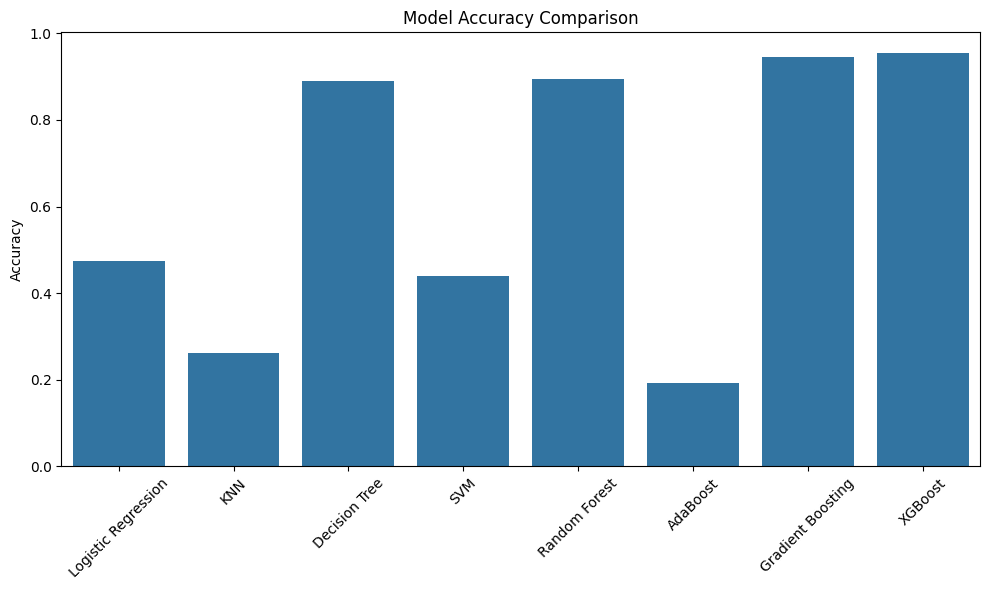

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.tight_layout()
plt.show()

### 🔍 Confusion Matrix of the Best Model

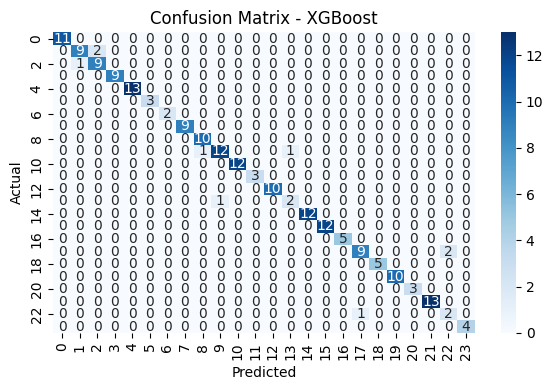

In [7]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
preds = best_model.predict(X_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [8]:
for name, model in models.items():
    print(f"\n{name} Evaluation:")
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("-" * 40)



Logistic Regression Evaluation:
Train Accuracy: 0.6187
Test Accuracy: 0.4747
----------------------------------------

KNN Evaluation:
Train Accuracy: 0.5543
Test Accuracy: 0.2626
----------------------------------------

Decision Tree Evaluation:
Train Accuracy: 1.0000
Test Accuracy: 0.8889
----------------------------------------

SVM Evaluation:
Train Accuracy: 0.7412
Test Accuracy: 0.4394
----------------------------------------

Random Forest Evaluation:
Train Accuracy: 1.0000
Test Accuracy: 0.8939
----------------------------------------

AdaBoost Evaluation:
Train Accuracy: 0.1919
Test Accuracy: 0.1919
----------------------------------------

Gradient Boosting Evaluation:
Train Accuracy: 1.0000
Test Accuracy: 0.9444
----------------------------------------

XGBoost Evaluation:
Train Accuracy: 1.0000
Test Accuracy: 0.9545
----------------------------------------


In [9]:
from sklearn.model_selection import cross_val_score

best_model = models['XGBoost']
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy per fold:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-Validation Accuracy per fold: [0.93434343 0.92929293 0.94949495 0.93939394 0.95454545]
Mean CV Accuracy: 0.9414141414141415
